In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import math

# Read data from mesa data: 
a = pd.read_excel('ONe6040_helm_update.xlsx')

In [16]:
r_cm = np.array(a["radius_cm"])
rho = np.power(10,np.array(a["logRho"]))
temp = np.array(a["temperature"])
pressure = np.array(a['pressure'])

In [17]:
data = pd.DataFrame(columns = ['r_center [cm]'],data = r_cm[::-1])
data['density [g/cm3]'] = rho[::-1]
data['temperature [K]'] = temp[::-1]
data['pressure'] = pressure[::-1]
data['neon20'] = np.array(a['ne20'])[::-1]
data['oxygen16'] =  np.array(a['o16'])[::-1]
data['oxygen20'] =  np.array(a['o20'])[::-1]
data['magnesium24'] =  np.array(a['mg24'])[::-1]
data['fluorine20'] =  np.array(a['f20'])[::-1]
data['helium4'] =  np.array(a['he4'])[::-1]
data['aluminum27'] = 0.0
data['silicon28'] =  np.array(a['si28'])[::-1]
data['sulfur32'] = 0.0
data['phosphorus31'] = 0.0
data['hydrogen1'] =  np.array(a['h1'])[::-1]
data['temperature [K]'] = data['temperature [K]']/1.124*1.42

In [18]:
data.head(3)

,r_center [cm],density [g/cm3],temperature [K],pressure,neon20,oxygen16,oxygen20,magnesium24,fluorine20,helium4,aluminum27,silicon28,sulfur32,phosphorus31,hydrogen1
0,4226.946083,8.348568e+09,8.294942e+08,7.367388e+27,0.007297,0.599994,0.392705,4.964879e-16,2.021100e-09,8.924793e-23,0.0,0.000004,0.0,0.0,0.0
1,4384.531853,8.348568e+09,8.294942e+08,7.367388e+27,0.007297,0.599994,0.392705,4.964889e-16,2.021100e-09,8.924807e-23,0.0,0.000004,0.0,0.0,0.0
2,4459.320035,8.348568e+09,8.294942e+08,7.367388e+27,0.007297,0.599994,0.392705,4.964890e-16,2.021100e-09,8.924809e-23,0.0,0.000004,0.0,0.0,0.0


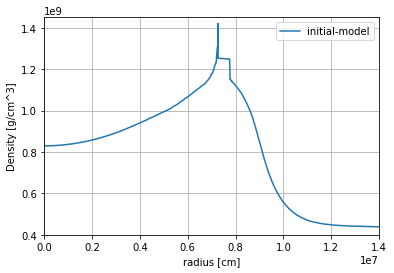

In [19]:
plt.plot(data['r_center [cm]'],data['temperature [K]'],'-',label='initial-model')
#plt.plot(r_cm,rho,":",label="MESA")
plt.xlim(0.e6,1.4e7)
plt.ylim(0.4e9,1.45e9)
plt.grid()
plt.xlabel("radius [cm]")
plt.ylabel("Density [g/cm^3]")
plt.legend()
plt.savefig("Density.png")

In [20]:
max(data['temperature [K]'])

1420533243.0899162

In [21]:
f = open("mesa.raw", "w")

npts = str(data.shape[0])

header = '# npts = '+npts+'\n# num of variables = 14\n# density\n# temperature\n# pressure\n# neon-20\n# oxygen-16\n# oxygen-20\n# magnesium-24\n# fluorine-20\n# helium-4\n# aluminum-27\n# silicon-28\n# sulfur-32\n# phosphorus-31\n# hydrogen-1\n'
f.write(header)

for i in range(data.shape[0]):
    for j in data.columns:
        f.write(str(data[j][i]))
        f.write(' ')
    f.write('\n')
f.close()